# Predictive modeling of Breast Cancer Data with Principal Component Analysis and Support Vector Machines 

The data is from the Breast Cancer Wisconsin (Diagnostic) dataset provided by the University of Wisconsin (1995). 

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Principal Component Analysis


In [174]:
from sklearn.datasets import load_breast_cancer

In [175]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [176]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [177]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [178]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [179]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

It is difficult to visualize high dimensional data, so I use PCA to find the first three principal components. I first scaled the features to maximize the variance of the features, give equal weight to all features, and other reasons. 

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [182]:
scaled_data = scaler.transform(df)

In [183]:
from sklearn.decomposition import PCA

In [184]:
pca = PCA(n_components=3)

In [185]:
pca.fit(scaled_data)

PCA(n_components=3)

In [186]:
x_pca = pca.transform(scaled_data)

In [187]:
scaled_data.shape

(569, 30)

In [188]:
x_pca.shape

(569, 3)

Visualizing the Principal Components

In [189]:
from mpl_toolkits.mplot3d import Axes3D

Text(0, 0.5, 'Second Principal Component')

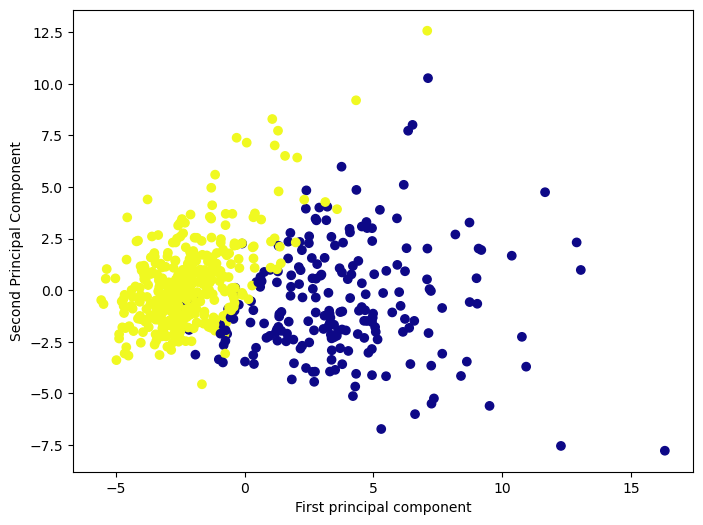

In [190]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

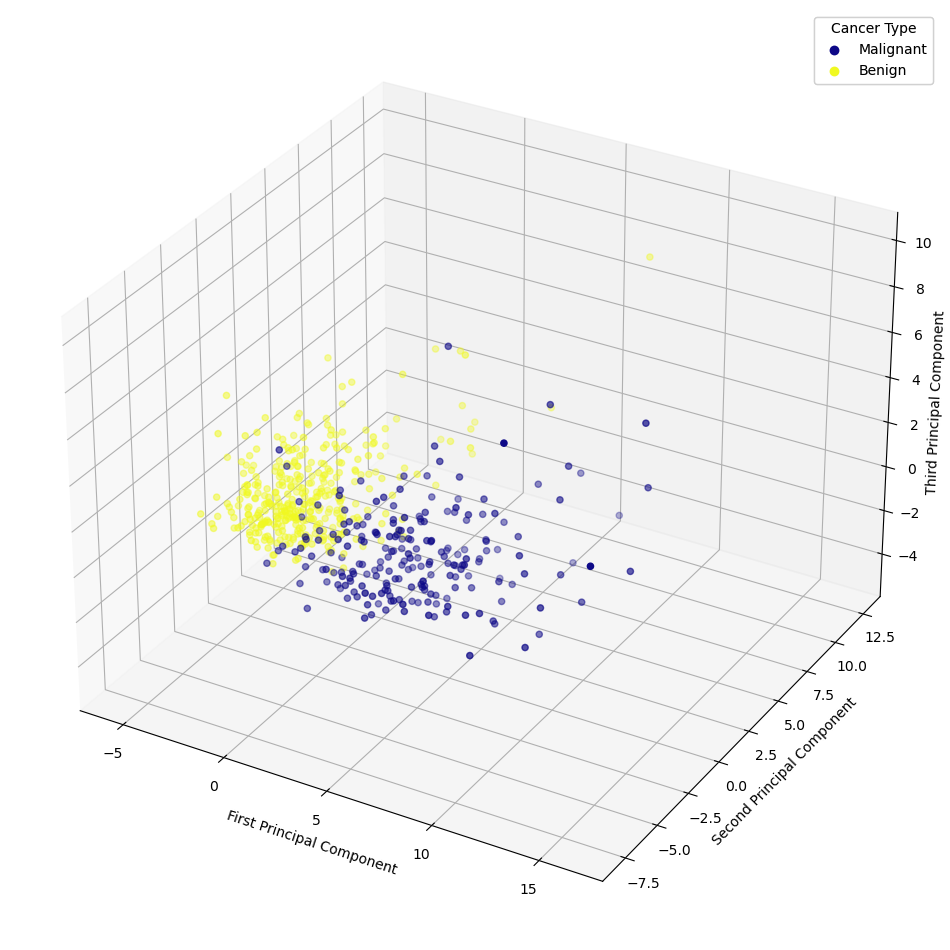

<Figure size 640x480 with 0 Axes>

In [191]:
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=cancer['target'], cmap='plasma')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component', labelpad=0)

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cancer Type")
legend.get_texts()[0].set_text('Malignant')
legend.get_texts()[1].set_text('Benign')
ax.add_artist(legend)

plt.show()
plt.tight_layout()

## Interpreting the components 

In [192]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853125,  0.0645499 , -0.00931422,  0.02869952, -0.10429191,
        -0.07409157,  0.00273385, -0.02556353, -0

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. So I visualize this relationship with a heatmap:

In [193]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<Axes: >

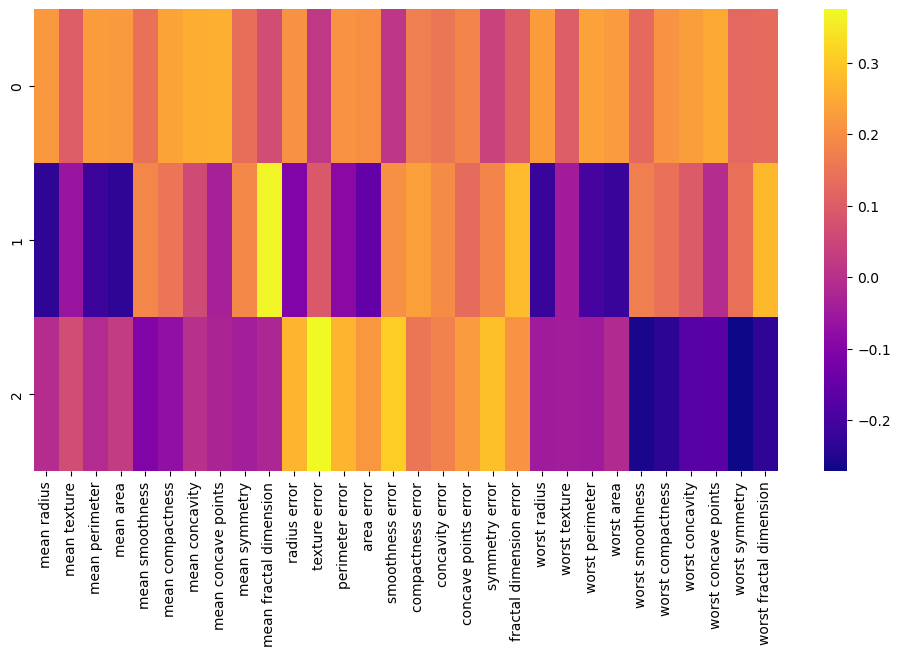

In [194]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

In [195]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [196]:
cancer ['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Support Vector Classifier



In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x = x_pca
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [199]:
from sklearn.svm import SVC

In [200]:
model = SVC()

In [201]:
model.fit(X_train,y_train)

SVC()

## Predictions and Evaluations

In [202]:
predictions = model.predict(X_test)

In [203]:
from sklearn.metrics import classification_report,confusion_matrix

In [204]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 57   9]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.92      0.96      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



Not good enough...

# Gridsearch

Finding the best C and gamma values

In [205]:
param_grid = {'C': [1, 10, 100, 1000,3000, 5000, 7000, 10000], 'gamma': [0.1,0.05,0.01,0.005,0.001,0.0001], 'kernel': ['rbf']} 

In [206]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier.

In [207]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [208]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.05, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.05, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.05, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.05, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.05, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 3000, 5000, 7000, 10000],
                         'gamma': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [209]:
grid.best_params_

{'C': 5000, 'gamma': 0.005, 'kernel': 'rbf'}

In [210]:
grid.best_estimator_

SVC(C=5000, gamma=0.005)

In [211]:
grid_predictions = grid.predict(X_test)

In [212]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 62   4]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.96      0.96      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

